# Parcours de graphe

L'objectif de ce projet est d'étudier des algorithmes de calcul de plus court chemin.

Ce projet est :

*   À faire par groupe de 4 maximum
*   À rendre sous forme de notebook Jupyter sur Moodle au plus tard le vendredi 12 avril à 23h59.

Ce sujet a été testé sur la machine virtuelle "ULR Ubuntu 20.04". Il devrait aussi fonctionner sur les installations Linux récentes, et sur Google Collab.

In [41]:
# Installation des dépendances

!pip install partition-networkx
!pip install matplotlib
!pip install networkx

import networkx as nx
import matplotlib.pyplot as plt

In [66]:
def mydraw(G, edges):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_color="grey")
    nx.draw_networkx_edges(G, pos, edge_color="red")
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=6, alpha=0.5, edge_color="orange")
    nx.draw_networkx_labels(G, pos)
    plt.show()

## Échauffement

Le code ci dessous permet de générer un graphe $G$. Vous utiliserez ce graphe pour tout le reste du projet.

In [43]:
# Génération d'un graphe aléatoire contenant 200 sommets

G = nx.gnp_random_graph(200, 0.6)

sommet1 = 10
sommet2 = 20

### Implémentation de l'algorithme de Dijkstra

L'algorithme de Dijkstra est un algorithme de calcul de plus court chemin dans un graphe, propose par Edsger Dijkstra en 1959.

Je vous propose de commencer par implémenter cet algorithme. Vous avez normalement vu cet algorithme en CM et en TD. Si vous en avez besoin, vous pouvez aussi consulter la [page Wikipédia](https://fr.wikipedia.org/wiki/Algorithme_de_Dijkstra), ou même la [publication originale](https://d1wqtxts1xzle7.cloudfront.net/82011040/9256D-libre.pdf?1646987426=&response-content-disposition=inline%3B+filename%3DA_Note_on_Two_Problems_in_Connexion_with.pdf&Expires=1709315850&Signature=dcrazHFOoCjPooxh~~A8wHovENpsna4Moa2NqtpKl-eyfSW~buuvxBC0vuD6TyKEdViPTsnNg9ii1kQJt65WKHto3cWvoElwa8u8AjRHgAu7L~GVU~eeRCKL~vb1nQzWeOaMseIv27eWndKIvTnipqWqJ2QDueuwA8Ii9m6HOovxXqZPSVL1bsI~ok9uLfQ0R9-MHPeC8Xd5okdJUtgOTVrn1hrQZBRcRxyG-Aq1kxwO4iOM3yNiD-UKe4JFUq1d~FyFzo00G9zgaS0LfR-h0YBA4EYk89Vkfv6ZCdgWgq8ndaZjo~yuK7Azf2JZYWUkO-bGEN~mYSikOxTdBWvzyQ__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA). Votre implémentation retournera un plus court chemin de la forme `[source, sommet_1, sommet_2, ..., target]`.

In [44]:
def dijkstra(G, source, target):
    L = []
    
    return L

Vérifiez vos résultats en les comparant au plus court chemin fourni par [l'implémentation de l'algorithme de Dijkstra par la librairie Networkx](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.weighted.dijkstra_path.html) à l'aide du code ci-dessous.

Ne touchez pas au code ci-dessous, je m'en servirai pour noter vos travaux.

In [45]:
path1 = nx.dijkstra_path(G, sommet1, sommet2)
print(path1)
path2 = dijkstra(G, sommet1, sommet2)
print(path2)
print(path1 == path2)

[10, 20]
[]
False


L'inconvévient de l'algorithme de Dijkstra est qu'il explore une grande partie du graphe avant de trouver le plus court chemin. C'est à dire qu'en partant d'un sommet source, il va passer en revue beaucoup de sommets avant de trouver le sommet destination. D'autres algorithmes, comme l'[algorithme A*](https://fr.wikipedia.org/wiki/Algorithme_A*) proposent des optimisations permettant d'explorer moins de sommets, et donc de trouver un plus court chemin plus rapidement.

### Étude du temps d'exécution

Affichez maintenant le temps d'exécution de votre implémentation de Dijkstra en fonction de la taille d'un graphe $H$ (en nombre de sommets).

Vous pouvez générer de nouveaux graphes pour cette question uniquement. Dans le reste de votre projet, vous devez utiliser le graphe $G$ généré au début de ce document.

Vous pouvez utiliser la librairie [time](https://docs.python.org/fr/3/library/time.html) et/ou [datetime](https://docs.python.org/fr/3/library/datetime.html) pour mesurer des temps d'exécution.

Vous pouvez utiliser la librairie [matplotlib](https://matplotlib.org/stable/) pour afficher vos résultats. J'ai utilisé [plt.plot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) pour la figure ci-dessous.

J'ai volontairement laissé la figure que j'obtiens avec mon code pour vous donner une idée du résultat attendu.

Affichez maintenant le temps d'exécution de votre implémentation de Dijkstra en fonction du nombre de plus court chemins demandés (donc en fonction du nombre d'exécutions de Dijkstra), pour le graphe $G$ (généré lors de l'échauffement).

Sans surprise, le temps d'exécution augmente de manière linéaire par rapport au nombre d'exécution de Dijkstra demandé : deux exécutions de Dijkstra prennent environ deux fois plus de temps qu'une seule exécution. Ceci n'est pas vrai pour tous les algorithmes. Certaines approches réalisent une étape de précalcul, qui permet d'économiser du temps lors des futurs exécutions.

## Algorithme d'Akiba

Nous allons maintenant étudier l'[algorithme d'Akiba](https://arxiv.org/pdf/1304.4661.pdf), qui est un algorithme de calcul de distance (longueur d'un plus court chemin) dans des graphes, proposé en 2013 par Akiba *et al*. Cet algorithme réalise d'abord une étape de précalcul, pendant laquelle il ajoute des étiquettes (*labels*) sur les sommets du graphe. Ces étiquettes permettent ensuite de répondre rapidement à des requêtes demandant d'identifier la distance entre deux sommets.

Plus précisément, cet algorithme :

* Calcule pour chaque sommet $u$ de $G$, des étiquettes (pas toutes) de la forme ($v_i$, δ$(u, v_i)$), où δ$(u, v_i)$ représente la distance entre u et $v_i$ dans $G$.
* L'ensemble d'étiquettes $L$ est calculé en faisant un parcours en largeur partiel, depuis chaque sommet $u$ de $G$.
* Une fois $L$ calculé, la distance entre deux sommets $u$ et $v$ est calculée en faisant `requete(u, v, L)`. Cette fonction consiste simplement à trouver un sommet $z$ tel que :
  * ($z$, δ$(u, z)$) et ($z$, δ$(v, z)$) existent, c'est à dire que $z$ est dans les étiquettes de $u$ et de $v$
  * $z$ minimise δ$(u, z)$ + δ$(v, z)$, c'est à dire la distance en $u$ et $z$ puis la distance entre $z$ et $v$.

L'algorithme d'Akiba ne calcule pas toutes les étiquettes de chacun des sommets, ce serait très couteux en temps et en mémoire. L'algorithme effectue des parcours en largeur partiels, comme suit :

* Initialement, l'ensemble d'étiquettes $L_0$ est vide. L'ensemble d'étiquettes $L_k$ est généré lors du $k$ ième parcours en largeur. Lors du $k+1$ ième parcours en largeur, effectué depuis un sommet $u$, l'algorithme ne parcours pas les voisins d'un sommet $v$ (donc dans l'arbre généré par ce parcours, $v$ sera une feuille) quand `requete(u, v, L_k)` est inférieur ou égal à la distance mesurée lors du $k+1$ ième parcours. Autrement dit, on ne parcours pas au dela du sommet $v$, quand on sait déjà qu'il existe un chemin plus court reliant $u$ à $v$.

Pour plus de détails, je vous invite à consulter [la publication originale](https://arxiv.org/pdf/1304.4661.pdf) (vous pouvez bien sûr aussi me poser des questions).

### Parcours en largeur

Commencez par implémenter un parcours en largeur complet d'un graphe $G$, sans l'optimisation mentionée ci-dessus. `BFS(G, u)` doit retourner un dictionnaire $L$ tel que `L[v]` est égal à la distance entre le sommet $u$ et le sommet $v$ dans le graphe $G$, pour tous les sommets $v$ du graphe $G$.

In [60]:
import queue

def BFS(G, u):
    L = {u : 0}
    q = queue.Queue()
    visited = {u}
    q.put([u, 0])
    while not q.empty():
        [u, dist]= q.get()
        for v in G.neighbors(u):
            if v not in visited:
                visited.add(v)
                L[v] = dist + 1
                q.put([v, L[v]])
    return L

### Pour avoir un support visuel, on utilise une version qui retourne L et les arêtes retenues
def BFSdraw(G, u):
    L = {u : 0}
    q = queue.Queue()
    visited = {u}
    edges = []
    q.put([u, 0])
    while not q.empty():
        [u, dist]= q.get()
        for v in G.neighbors(u):
            if v not in visited:
                visited.add(v)
                edges.append((u, v))
                L[v] = dist + 1
                q.put([v, L[v]])
    return L, edges

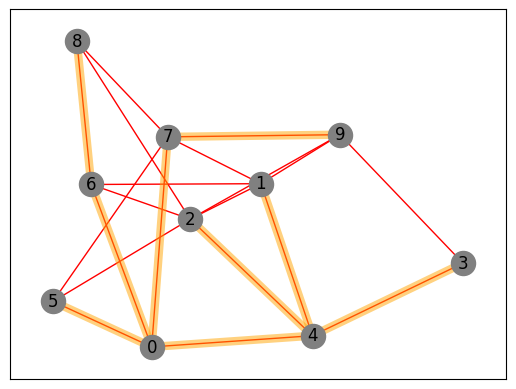

In [76]:
G = nx.gnp_random_graph(10, 0.5)
L, edges = BFSdraw(G,0) 
mydraw(G, edges)
# L = BFS(G, 0) 
# nx.draw(G, with_labels=True)
# print(L)

### Approche naïve

Effectuez un parcours en largeur depuis chaque sommet $u$ de $G$, puis remplissez l'ensemble d'étiquettes $L$. `L[u][v]` est égal à la distance entre $u$ et $v$ dans $G$. Retournez $L$.

In [48]:
def naive(G):
    L = {}
    for u in G.nodes:
        L[u] = BFS(G, u)
    return L

**Question :** Quelle est la complexité de `naive(G)` ? Donnez simplement l'ordre de grandeur (par exemple $O(n)$), ainsi qu'une justification en quelques lignes, pas besoin de fournir de coefficients ni de constantes.

**Réponse :**

### Requête

Implémentez une méthode `requete(u, v, L)` permettant de récupérer la distance entre $u$ et $v$ dans $G$ depuis $L$. Pour ce faire, à partir de `L[u]` et `L[v]`, vous devez trouver le sommet $z$ qui minimise la distance `L[u][z] + L[v][z]`. Retournez cette distance.

In [106]:
def requete(u, v, L):
    distance = None
    if u not in L or v not in L:
        return distance
    for z in L[u]:
        if z in L[v]:
            dist_temp = L[u][z] + L[v][z]
            if distance is None or dist_temp < distance:
                distance = dist_temp
    return distance if distance is None else 0

### Akiba

Vous allez maintenant implémenter l'algorithme d'Akiba. Cet algorithme est similaire à l'approche naïve que vous avez déjà implémentée. L'idée est d'effectuer des parcours en largeur partiels, de manière à éviter de renseigner deux fois la même information dans l'ensemble d'étiquettes $L$, comme expliqué ci-dessus.

Commencez par implémenter la méthode `pruned_BFS(G, u, L)`, qui va effectuer un parcours en largeur partiel depuis le sommet $u$ dans le graphe $G$. Au moment où le parcours considère le sommet $v$, vous ne devez pas explorer les voisins de $v$ si `requete(u, v, L)` est inférieur ou égal à la distance entre $u$ et $v$ mesurée lors de ce parcours. Sinon, vous devez rajouter l'étiquette `L[u][v]` (donc la distance entre $u$ et $v$) à $L$, comme expliqué dans [la publication originale](https://arxiv.org/pdf/1304.4661.pdf).

Retournez l'ensemble d'étiquette $L_{new}$, qui est l'ensemble d'étiquettes $L$, auquel vous aurez rajouté les étiquettes du parcours en largeur partiel depuis $u$.

In [104]:
def pruned_BFS(G, vk, L):
    L_new = L.copy()
    P = {v: float('inf') for v in G.nodes()}
    P[vk] = 0
    q = queue.Queue()
    q.put(vk)
    while not q.empty():
        u = q.get()
        if requete(u, vk, L) <= P[u]:
            continue
        L_new[u] = L[u].union({vk: P[u]})
        for w in G.neighbors(u):
            if P[w] == float('inf'):
                P[w] = P[u] + 1
                q.put(w)         
    return L_new

### Pour avoir un support visuel, on utilise une version qui retourne L et les arêtes retenues

def pruned_BFSdraw(G, vk, L):
    L_new = L.copy()
    P = {v: float('inf') for v in G.nodes()}
    P[vk] = 0
    edges = []
    q = queue.Queue()
    q.put(vk)
    while not q.empty():
        u = q.get()
        if requete(u, vk, L) <= P[u]:
            continue
        L_new[u] = L[u].union({vk: P[u]})
        edges.append((u, vk))
        for w in G.neighbors(u):
            if P[w] == float('inf'):
                P[w] = P[u] + 1
                q.put(w)         
    return L_new, edges

In [105]:
G = nx.gnp_random_graph(10, 0.5)
L = {}
L, edges = pruned_BFSdraw(G, 0, L) 
mydraw(G, edges)
#L = pruned_BFS(G, 0, L) 
#nx.draw(G, with_labels=True)
print(L)

TypeError: '<=' not supported between instances of 'NoneType' and 'int'

Vous pouvez maintenant effectuer un `pruned_BFS(G, u, L)` depuis tous les sommets $u$ de $G$, de manière à remplir l'ensemble d'étiquettes $L$.

In [101]:
def akiba(G):
    L = {}
    for u in G.nodes():
        L = pruned_BFS(G, u, L)
    return L

In [52]:
sommet1 = 1
sommet2 = 2

Votre implémentation de l'algorithme d'Akiba devrait maintenant être fonctionnelle. Vous pouvez vérifier son bon fonctionnement en comparant son résultat avec le résultat de la fonction [shortest_path_length](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path_length.html) de la librairie Networkx. Je vous conseille de vérifier vos résultats sur plusieurs paires de sommets car j'utiliserai une paire de sommets aléatoire, ainsi qu'un autre graphe quand je noterai vos travaux.

Ne touchez pas au code ci-dessous, je m'en servirai pour noter vos travaux.

In [53]:
distance1 = nx.shortest_path_length(G, sommet1, sommet2)
print(distance1)
L = akiba(G)
distance2 = requete(sommet1, sommet2, L)
print(distance2)
print(distance1 == distance2)

4


TypeError: unhashable type: 'list'

Pour finir, affichez le temps d'éxecution de votre implémentation d'Akiba en fonction du nombre de requêtes (le nombre d'exécutions de `requete(u, v, L)`).

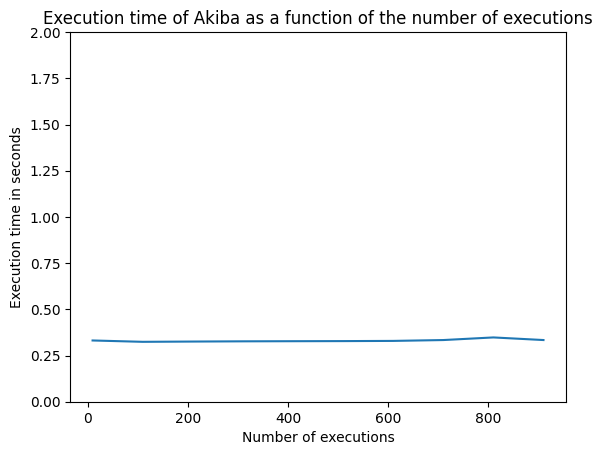

L'algorithme d'Akiba prend plus de temps que Dijkstra lors de la première requête car il doit construire l'ensemble d'étiquettes. Par contre, les requêtes suivantes prennent très peu de temps. Cet algorithme est donc rentable si le nombre de requêtes est élevé.